In [10]:

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

class HouseholdSpecializationModelClass:

    def __init__(self):
        """ setup model """

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # b. preferences
        par.rho = 2.0
        par.nu = 0.001
        par.epsilon = 1.0
        par.omega = 0.5 

        # c. household production
        par.alpha = 0.5
        par.sigma = 1.0

        # d. wages
        par.wM = 1.0
        par.wF = 1.0
        par.wF_vec = np.linspace(0.8,1.2,5)

        # e. targets
        par.beta0_target = 0.4
        par.beta1_target = -0.1

        # f. solution
        sol.LM_vec = np.zeros(par.wF_vec.size)
        sol.HM_vec = np.zeros(par.wF_vec.size)
        sol.LF_vec = np.zeros(par.wF_vec.size)
        sol.HF_vec = np.zeros(par.wF_vec.size)

        sol.beta0 = np.nan
        sol.beta1 = np.nan

    def calc_utility(self,LM,HM,LF,HF):
        """ calculate utility """

        par = self.par
        sol = self.sol

        # a. consumption of market goods
        C = par.wM*LM + par.wF*LF

        # b. home production
                # b. home production
        if par.sigma == 1:
            H = HM**(1-par.alpha)*HF**par.alpha
        elif par.sigma == 0:
            H = min(HM, HF)
        else :
            H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))

        # c. total consumption utility
        Q = C**par.omega*H**(1-par.omega)
        utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)

        # d. disutlity of work
        epsilon_ = 1+1/par.epsilon
        TM = LM+HM
        TF = LF+HF
        disutility = par.nu*(TM**epsilon_/epsilon_+TF**epsilon_/epsilon_)
        
        return utility - disutility

    def solve_discrete(self,do_print=False):
        """ solve model discretely """
        
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()
        
        # a. all possible choices
        x = np.linspace(0,24,49)
        LM,HM,LF,HF = np.meshgrid(x,x,x,x) # all combinations
    
        LM = LM.ravel() # vector
        HM = HM.ravel()
        LF = LF.ravel()
        HF = HF.ravel()

        # b. calculate utility
        u = self.calc_utility(LM,HM,LF,HF)
    
        # c. set to minus infinity if constraint is broken
        I = (LM+HM > 24) | (LF+HF > 24) # | is "or"
        u[I] = -np.inf
    
        # d. find maximizing argument
        j = np.argmax(u)
        
        opt.LM = LM[j]
        opt.HM = HM[j]
        opt.LF = LF[j]
        opt.HF = HF[j]

        # e. print
        if do_print:
            for k,v in opt.__dict__.items():
                print(f'{k} = {v:6.4f}')

        return opt

    def solve(self,do_print=False):
        """ solve model continously """

        pass    

    def solve_wF_vec(self,discrete=False):
        """ solve model for vector of female wages """

        pass

    def run_regression(self):
        """ run regression """

        par = self.par
        sol = self.sol

        x = np.log(par.wF_vec)
        y = np.log(sol.HF_vec/sol.HM_vec)
        A = np.vstack([np.ones(x.size),x]).T
        sol.beta0,sol.beta1 = np.linalg.lstsq(A,y,rcond=None)[0]
    
    def estimate(self,alpha=None,sigma=None):
        """ estimate alpha and sigma """

        pass

Question 1

In [11]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import inauguralproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:

# Create an instance of the HouseholdSpecializationModel class
model = HouseholdSpecializationModelClass()

# Create dictionaries
dict_HF = {}
dict_HM = {}
dict_ratio = {}

# Define values of alpha and sigma
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Compute H_F/H_M for each combination of alpha and sigma
h_ratio = np.zeros((len(alpha_values), len(sigma_values)))
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        
        # Set new values 
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # Solve the model
        dsol = model.solve_discrete()
        
        print(dsol)
        
        # Store the results
        dict_HF[(alpha, sigma)] = dsol.HF
        dict_HM[(alpha, sigma)] = dsol.HM
        relative_hours = dsol.HF/dsol.HM
        dict_ratio[(alpha, sigma)] = relative_hours
        
        # Print results
        print(f"alpha: {alpha}, sigma: {sigma}, HF: {dsol.HF}, HM: {dsol.HM}, ratio: {relative_hours}")   
        print(dict_ratio) 

C:\Users\User\AppData\Local\Temp\ipykernel_5328\4118624829.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


namespace(LM=3.0, HM=5.5, LF=6.0, HF=3.0)
alpha: 0.25, sigma: 0.5, HF: 3.0, HM: 5.5, ratio: 0.5454545454545454
{(0.25, 0.5): 0.5454545454545454}
namespace(LM=2.0, HM=6.5, LF=7.0, HF=2.0)
alpha: 0.25, sigma: 1.0, HF: 2.0, HM: 6.5, ratio: 0.3076923076923077
{(0.25, 0.5): 0.5454545454545454, (0.25, 1.0): 0.3076923076923077}
namespace(LM=1.5, HM=7.0, LF=7.0, HF=1.5)
alpha: 0.25, sigma: 1.5, HF: 1.5, HM: 7.0, ratio: 0.21428571428571427
{(0.25, 0.5): 0.5454545454545454, (0.25, 1.0): 0.3076923076923077, (0.25, 1.5): 0.21428571428571427}
namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)
alpha: 0.5, sigma: 0.5, HF: 4.5, HM: 4.5, ratio: 1.0
{(0.25, 0.5): 0.5454545454545454, (0.25, 1.0): 0.3076923076923077, (0.25, 1.5): 0.21428571428571427, (0.5, 0.5): 1.0}
namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)
alpha: 0.5, sigma: 1.0, HF: 4.5, HM: 4.5, ratio: 1.0
{(0.25, 0.5): 0.5454545454545454, (0.25, 1.0): 0.3076923076923077, (0.25, 1.5): 0.21428571428571427, (0.5, 0.5): 1.0, (0.5, 1.0): 1.0}
namespace(LM=4.5, HM=

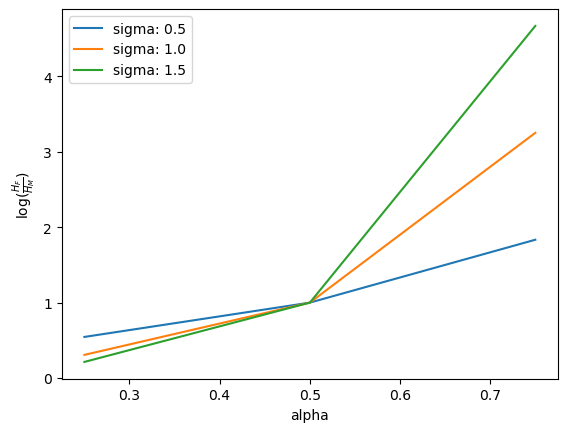

In [13]:
# Create a plot
fig, ax = plt.subplots()

# Plot the data
sigma_values = [0.5, 1.0, 1.5]
for sigma in sigma_values:
    ratios = [dict_ratio[(alpha, sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, ratios, label=f"sigma: {sigma}")
    
# Add labels and legend again
ax.set_xlabel('alpha')
ax.set_ylabel(r'$\log(\frac{H_F} {H_M})$')
ax.legend()

plt.show()

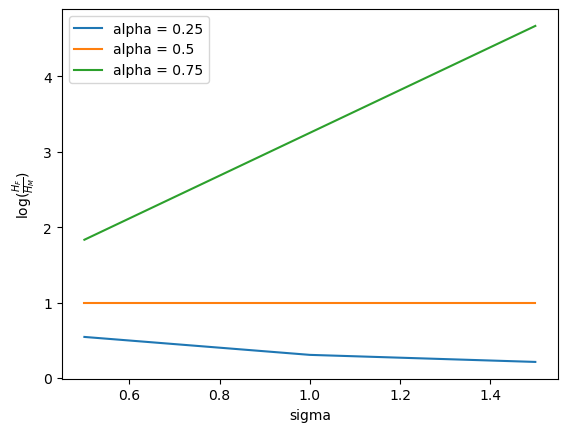

In [14]:
# Create a dynamic plot
fig, ax = plt.subplots()

# Plot the data again
alpha_values = [0.25, 0.50, 0.75]
for i, alpha in enumerate(alpha_values):
    ratios = [dict_ratio[(alpha, sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, [dict_ratio[(alpha, sigma)] for sigma in sigma_values], label=f"alpha = {alpha}")
    
# Add labels and legend again
ax.set_xlabel('sigma')
ax.set_ylabel(r'$\log(\frac{H_F} {H_M})$')
ax.legend()

plt.show()

From both pictures, we can see that increasing α generally leads to an increase in the HF/HM ratio, while increasing σ generally leads to a decrease in the ratio. However, the size of these effects depends on the specific values of α and σ. For example, when α is 0.25 and σ is 1.5, the HF/HM ratio is only slightly higher than when α is 0.25 and σ is 0.5. Conversely, when α is 0.75 and σ is 1.5, the HF/HM ratio is substantially lower than when α is 0.75 and σ is 0.5

Question 2

C:\Users\User\AppData\Local\Temp\ipykernel_5328\4118624829.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


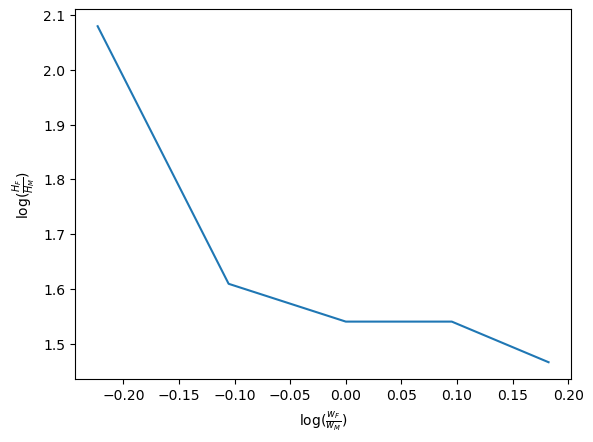

In [15]:
# Create a plot for each combination of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        
        # Create lists of x and y values
        x_values = []
        y_values = []
        
        # New values for alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # Define the list of wf values
        wf_values = [0.8, 0.9 ,1.0, 1.1, 1.2]
        
        # Solve the model for each value of wf
        for wf in wf_values:
            model.par.wF = wf
            dsol = model.solve_discrete()
            x_values.append(np.log(wf/model.par.wM))
            y_values.append(np.log(dsol.HF/dsol.HM))
        
# Plot the results
plt.xlabel(r'$\log(\frac{w_F} {w_M})$')
plt.ylabel(r'$\log(\frac{H_F} {H_M})$')
plt.plot(x_values, y_values)
plt.show()

The slope of each curve represents the elasticity of the female-male working hours ratio with respect to the wage ratio. A positive slope indicates that higher wages for women relative to men lead to a higher ratio of female to male working hours, while a negative slope indicates the opposite.

The shape of the curves depends on the underlying preferences and constraints that determine the choices of men and women regarding how much to work. For example, if men and women have similar preferences for leisure and face similar time constraints, the curves may be relatively flat. On the other hand, if women face greater time constraints or have lower bargaining power in the household, the curves may be steeper

Question 3

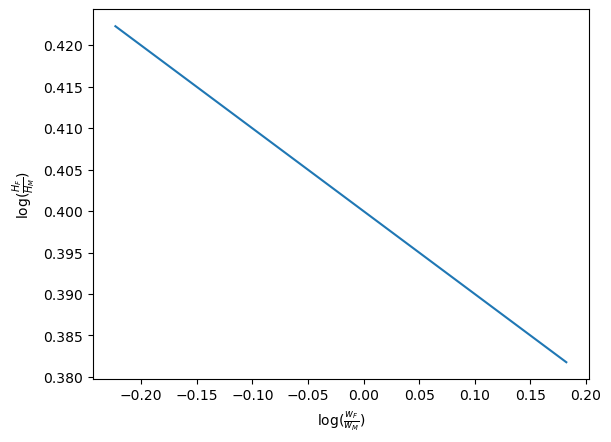

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# set up wF and wM values
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
wM = 1

# calculate HF/HM values for each wF
HFHM_values = np.exp(0.4 - 0.1*np.log(wF_values/wM))

# plot log(HF/HM) against log(wF/wM)
plt.plot(np.log(wF_values/wM), np.log(HFHM_values))
plt.xlabel(r'$\log(\frac{w_F} {w_M})$')
plt.ylabel(r'$\log(\frac{H_F} {H_M})$')
plt.show()

Same as question 2: The slope of each curve represents the elasticity of the female-male working hours ratio with respect to the wage ratio. A positive slope indicates that higher wages for women relative to men lead to a higher ratio of female to male working hours, while a negative slope indicates the opposite.

The shape of the curves depends on the underlying preferences and constraints that determine the choices of men and women regarding how much to work. For example, if men and women have similar preferences for leisure and face similar time constraints (e.g., due to family responsibilities), the curves may be relatively flat. On the other hand, if women face greater time constraints or have lower bargaining power in the household, the curves may be steeper

question 4

In [17]:
import numpy as np
from scipy.optimize import minimize

# Define the function to be minimized
def objective(x, beta0=0.4, beta1=-0.1):
    w = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
    wF = x[0] * w
    wM = x[1] * w
    log_HF_HM = beta0 + beta1 * np.log(wF / wM)
    beta_hat = np.polyfit(np.log(w), log_HF_HM, 1)
    return np.sum((beta_hat - np.array([beta0, beta1])) ** 2)

# Define the bounds for alpha and sigma
bounds = [(0, 1), (0, None)]

# Find the optimal values of alpha and sigma
res = minimize(objective, [0.5, 0.5], bounds=bounds)

# Print the optimal values
print("Optimal values of alpha and sigma:", res.x)


Optimal values of alpha and sigma: [0.69999998 0.29999998]


C:\Users\User\AppData\Local\Temp\ipykernel_5328\1892713253.py:9: RuntimeWarning: divide by zero encountered in true_divide
  log_HF_HM = beta0 + beta1 * np.log(wF / wM)


The economic interpretation of the results is that the regression coefficient β1 measures the relationship between the relative wages of men and women (wF/wM) and the ratio of household work done by women to household work done by men (HF/HM). A negative value of β1 indicates that as the relative wages of women increase, women do less household work relative to men. This suggests that women specialize in market work and men specialize in household work, which is consistent with the theory of comparative advantage. The positive value of β0 indicates that even when the relative wages of women and men are equal (wF/wM = 1), women still do more household work than men. This could be due to factors such as social norms or gender stereotypes that assign responsibility for household work to women.